In [68]:
import pandas as pd
import numpy as np

In [69]:
df=pd.read_csv("chess_games.csv")

dfvicopen= df[['victory_status', 'opening_shortname']]    

dfvicopen

,victory_status,opening_shortname
0,Out of Time,Slav Defense
1,Resign,Nimzowitsch Defense
2,Mate,King's Pawn Game
3,Mate,Queen's Pawn Game
4,Mate,Philidor Defense
...,...,...
20053,Resign,Dutch Defense
20054,Mate,Queen's Pawn
20055,Mate,Queen's Pawn Game
20056,Resign,Pirc Defense


In [47]:
mate= ['Mate']

dfmate= dfvicopen[dfvicopen['victory_status'].isin(mate)]

In [49]:
dfmateclean=dfmate['opening_shortname'].value_counts().to_frame()

In [67]:
winrate=dfmate['opening_shortname'].value_counts()[:30].sort_index(ascending=True)/dfvicopen['opening_shortname'].value_counts()[:30].sort_index(ascending=True)

<AxesSubplot:>

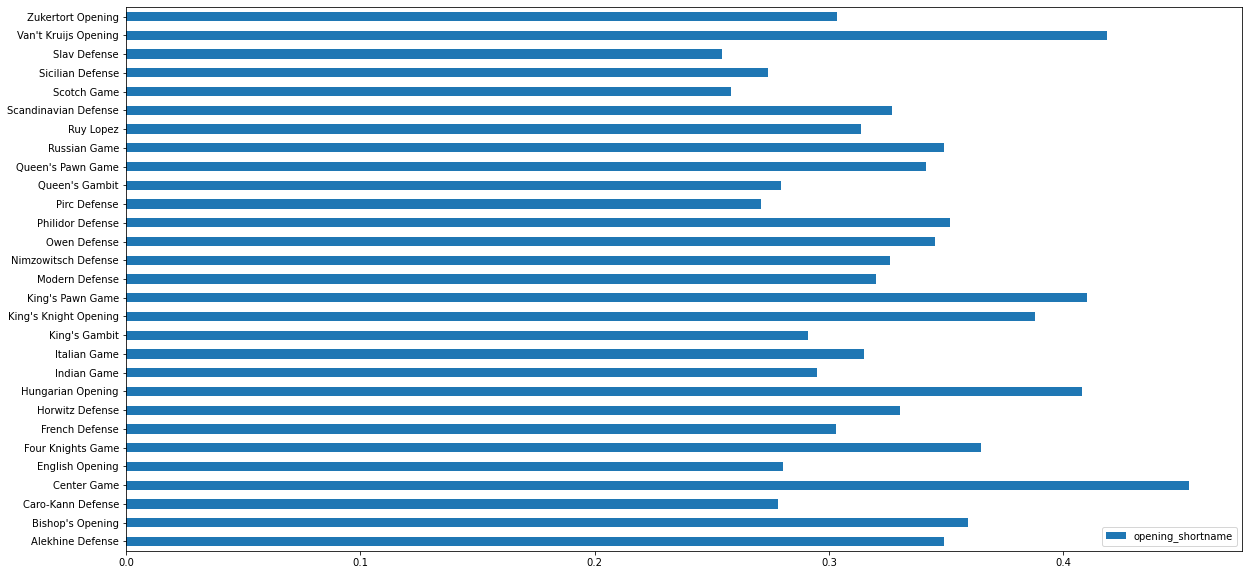

In [70]:
dfwinrate=winrate.to_frame()
dfwinrateclean=dfwinrate.dropna(axis=0)
dfwinrateclean.plot(kind="barh", figsize=(20,10))

In [98]:
df=pd.read_csv("chess_games.csv")

dfvicopen= df[['victory_status', 'opening_shortname']]
mate= ['Mate']

dfmate= dfvicopen[dfvicopen['victory_status'].isin(mate)]
winrate=dfmate['opening_shortname'].value_counts()[:31].sort_index(ascending=True)/dfvicopen['opening_shortname'].value_counts()[:31].sort_index(ascending=True)
dfwinrate=winrate.to_frame()
dfwinrateclean=dfwinrate.dropna(axis=0)

In [102]:
def load_and_process(notebooks):
    df=pd.read_csv("chess_games.csv")

    dfvicopen= df[['victory_status', 'opening_shortname']]
    mate= ['Mate']

    dfmate= dfvicopen[dfvicopen['victory_status'].isin(mate)]
    winrate=dfmate['opening_shortname'].value_counts()[:31].sort_index(ascending=True)/dfvicopen['opening_shortname'].value_counts()[:31].sort_index(ascending=True)
    dfwinrate=winrate.to_frame()
    
    return dfwinrateclean
    

In [103]:
load_and_process("chess_games.csv")

,opening_shortname
Alekhine Defense,0.348958
Bishop's Opening,0.359133
Caro-Kann Defense,0.278057
Center Game,0.453488
English Opening,0.280556
Four Knights Game,0.364865
French Defense,0.303116
Horwitz Defense,0.330144
Hungarian Opening,0.407821
Indian Game,0.294671


<AxesSubplot:>

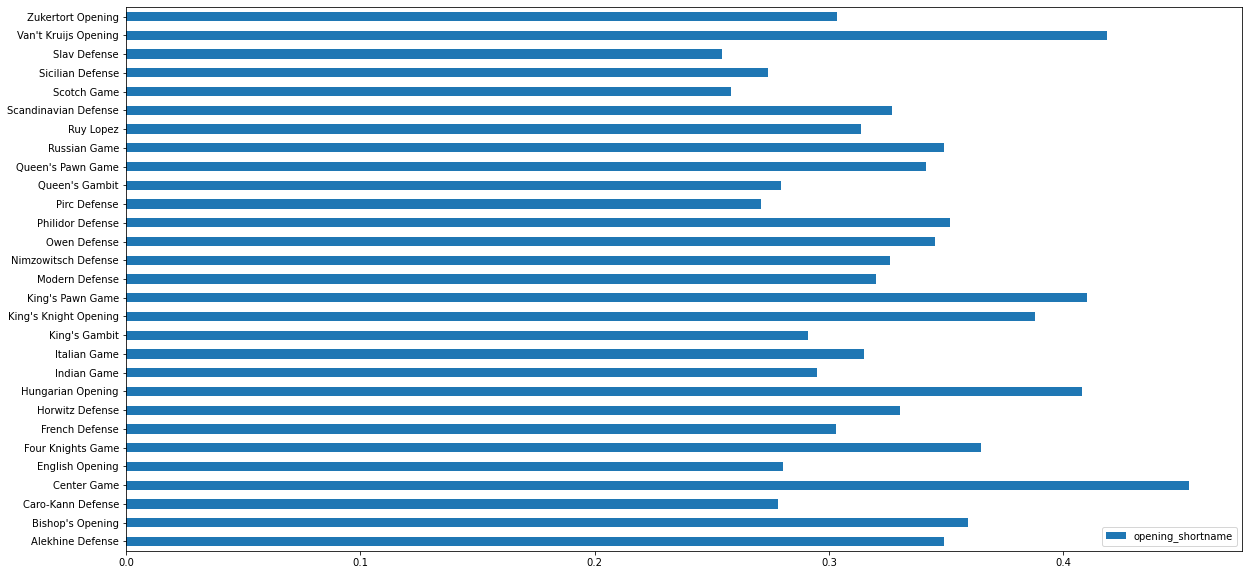

In [104]:

load_and_process("chess_games.csv").plot(kind="barh", figsize=(20,10))

In [83]:
#My inital research questions was to see which opening strategies had the high win rate. After cleaning and defining the data set this particular data frame I created, I was able to to calculate and
#and visualize the top 30 used strategies. I specifically chose the top 30 strategies used because strategies with low usage would provide little to no meaning as they would have a small
#sample size. Using the top 30 helped curb that as it could also create outliers in the dataframe. 

#We see here after adjusting for how many games were played with the following strategies, the "Center Game" strategy had the highest win rate with over 40% winrate

In [106]:
load_and_process("chess_games.csv").describe()

,opening_shortname
count,29.000000
mean,0.329558
std,0.050909
min,0.254167
25%,0.291139
50%,0.325893
75%,0.351664
max,0.453488


<AxesSubplot:>

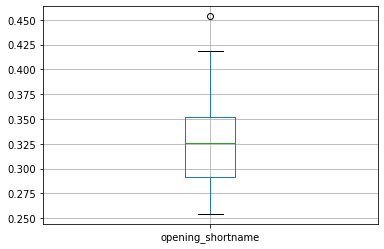

In [107]:
#Within the top 30 strategies that were used, the average wine rate is 32%.
#Additionally, the standard deviation was 5%. Meaning that the strategies' win rate vary from each other at 5%.
#To be percise, the "Central Game" strategy had a win rate of %45.3.
load_and_process("chess_games.csv").boxplot()

In [ ]:
#According the box plot, we see that actually the "Center Game" strategy is an outlier. After doing some research, Center Game strategy is a powerful strategy for non-professional chess players
#as try to counter the strategy requires some skill. Which does make sense with respect to where the data was collected. While in the real world, the Center Game strategy is hardly if ever used in
#competitve play as higher skilled players can detect and counter the play. 
#Besides the Center Game strategy, the top 3 strategies were: Van't Kruijs Open, King's Pawn Game and Hungarian Open. With All 3 of these having over 40% win rate.
#This also implies that these 3 strategies are above the upper quartile, while not exceeding the maximum for them to be considered outliers. 